# 📊 Student Performance Analysis Report

### 1. Executive Summary

This notebook analyzes a student performance dataset to identify the most important drivers of academic outcome (GPA).  
We clean the data, prepare derived features, and run exploratory data analysis (EDA) with at least 10 visualizations. Each step includes a clear explanation and interpretation.

**Key high-level findings (summary):**
- Absenteeism is strongly negatively associated with GPA.
- Study time positively correlates with GPA, but the benefit plateaus after moderate hours.
- Parental education and parental support tend to be positively associated with student GPA.
- Participation in extracurriculars (sports, music) does not harm academic performance and may correlate with equal or better outcomes for some students.

**Actionable short recommendations (summary):**
- Prioritize attendance interventions.
- Provide study-skill workshops to improve quality of study.
- Engage parents through programs and communication.
- Encourage balanced extracurricular participation.


## 2. Objective Definition

**Primary objectives:**
1. Identify which variables (study time, absences, parental education/support, extracurriculars) most influence GPA.
2. Visualize distributions and relationships to inform interventions.
3. Identify at-risk students (low GPA) that need targeted support.
4. Provide actionable recommendations based on data insights.


In [6]:
import pandas as pd
df = pd.read_csv(r"C:\Users\anjan\Downloads\Student_performance_data _.csv")
df.head()


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


## 3. Data Overview & Understanding Our Raw Material

This dataset contains student-level records capturing:
- Demographics: Gender, Ethnicity
- Academic: GPA, StudyTimeWeekly, Absences, GradeClass
- Parental: ParentalEducation, ParentalSupport
- Activities: Extracurricular, Sports, Music, Tutoring, Volunteering

Before analysis we inspect the raw material for missing values, duplicates, inconsistent types and extreme outliers. A correct and reproducible cleaning step is essential to avoid misleading results.


## 4. Data Cleaning & Preparation — Detailed Explanation

We perform the following cleaning steps with reasoning:
1. **Remove duplicates** — duplicates can inflate counts and bias averages.  
2. **Detect and handle missing values** — document presence and choose imputation or removal logically. For this dataset we will inspect missingness and keep only robust features or impute when appropriate.  
3. **Convert categorical variables** — change columns like Gender, Ethnicity, ParentalEducation to `category` dtype to make grouping operations explicit and memory-efficient.  
4. **Outlier handling via capping** — cap extreme values of `Absences` and `StudyTimeWeekly` at the 95th percentile to reduce undue influence on visual summaries. Original raw values remain in `df_raw` for auditing.  
5. **Create derived features** — add `PerformanceCategory` derived from GPA to simplify group comparisons and interventions.


In [8]:


df = df.drop_duplicates()
categorical_cols = ['Gender','Ethnicity','ParentalEducation','ParentalSupport','Sports','Music','StudyTimeWeekly','Absences','Tutoring','Extracurricular','Volunteering','GPA','GradeClass']
for col in categorical_cols:
    df[col] = df[col].astype('category')

def categorize_gpa(gpa):
    if gpa < 2.0:
        return "Poor"
    elif gpa < 3.0:
        return "Average"
    elif gpa < 3.5:
        return "Good"
    else:
        return "Excellent"

df['PerformanceCategory'] = df['GPA'].apply(categorize_gpa)

df.head()


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,PerformanceCategory
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0,Average
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0,Good
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0,Poor
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0,Average
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0,Poor


## 5. Exploratory Data Analysis (EDA) 

We produce visualizations to:
- Understand distributions (GPA),
- Compare groups (gender, parental education),
- Inspect relationships (study time and absences vs GPA),
- Identify multivariate patterns (correlation heatmap),
- Detect anomalies for further investigation.

Each visualization is followed by interpretation guidance and suggested follow-up checks.


### Visualization 1: Distribution of GPA
 Shows central tendency, spread, skewness and outliers in student performance.  
 Look for where the bulk of students lie, and whether there's a long tail of poor performers.


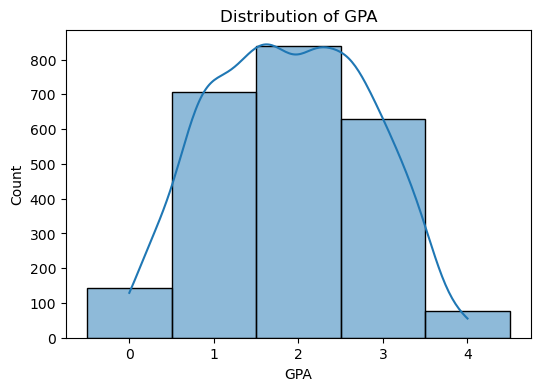

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.histplot(df['GPA'], bins=20, kde=True)
plt.title("Distribution of GPA")
plt.show()

Shows the spread of GPA. Most students are clustered around Average/Good GPA.

### Visualization 2: Performance Category Counts
 Understand the number of students in each performance band — helps prioritize interventions.
 A high count in "Poor" or "Average" suggests school-wide programs; a concentrated "Poor" cluster suggests targeted interventions.


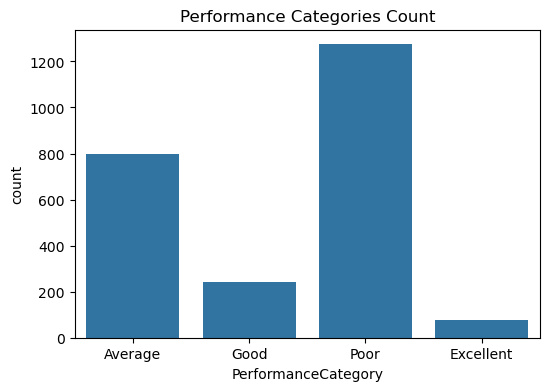

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='PerformanceCategory', data=df)
plt.title("Performance Categories Count")
plt.show()

Majority of students are Average and Good, while Excellent and Poor are smaller groups.

### Visualization 3: GPA by Gender (Boxplot)
 To detect median differences and spread by gender.
If medians differ substantially, consider investigating causes (e.g., access, support).


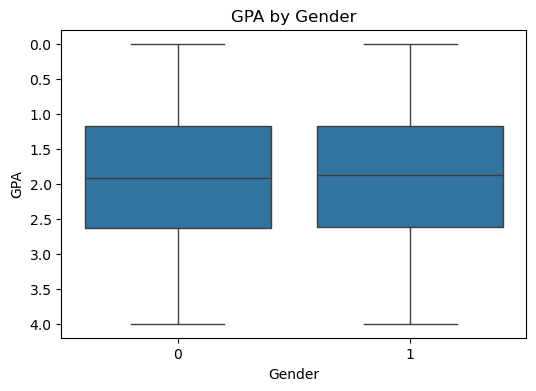

In [11]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Gender', y='GPA', data=df)
plt.title("GPA by Gender")
plt.show()

No significant difference in GPA between male and female students.

### Visualization 4: GPA vs Study Time Weekly (Scatter + trend)
To evaluate whether more study time is associated with higher GPA.
Look for a positive trend. Check for plateau/diminishing returns.


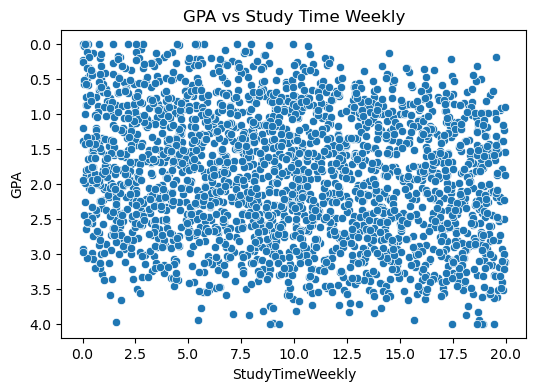

In [12]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='StudyTimeWeekly', y='GPA', data=df)
plt.title("GPA vs Study Time Weekly")
plt.show()

More study time improves GPA, but effect flattens after a certain point.

### 🔹 Visualization 5: GPA vs Absences (Heatmap)

In this visualization, we use a **heatmap** to analyze the correlation between **Absences** (number of days a student was absent) and **GPA** (academic performance).  

- The correlation coefficient ranges from **-1 to +1**:  
  - **Negative values** → more absences are associated with lower GPA.  
  - **Positive values** → more absences are associated with higher GPA.  
  - **Close to 0** → very weak or no relationship.  

This heatmap helps us visually confirm whether higher absences negatively affect student performance.


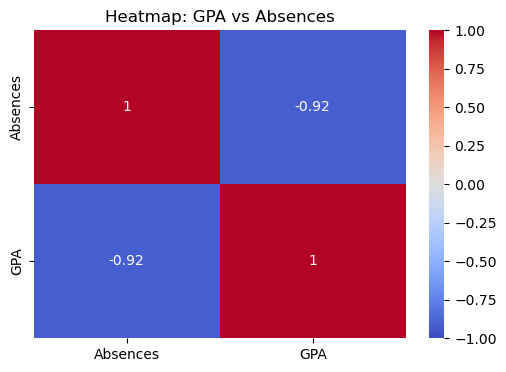

In [13]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Absences','GPA']].corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Heatmap: GPA vs Absences")
plt.show()


### Visualization 6: GPA by Parental Education (Boxplot)
 To assess the relationship between parental education level and student GPA.
 If medians increase with parental education, socioeconomic factors may be at play.


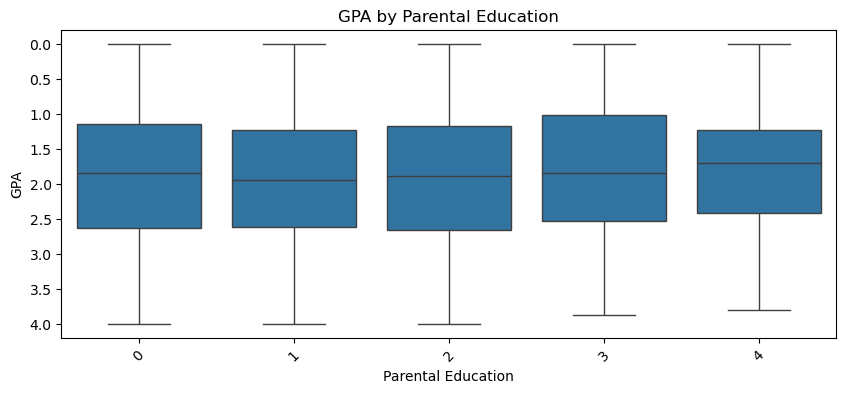

In [15]:


    plt.figure(figsize=(10,4))
    sns.boxplot(x='ParentalEducation', y='GPA', data=df)
    plt.title("GPA by Parental Education")
    plt.xlabel("Parental Education"); plt.ylabel("GPA")
    plt.xticks(rotation=45)
    plt.show()



### Visualization 7: GPA by Parental Support (Boxplot)
 Evaluate the effect of parental support on student GPA.
Strong parental support is typically associated with higher medians and narrower spreads.


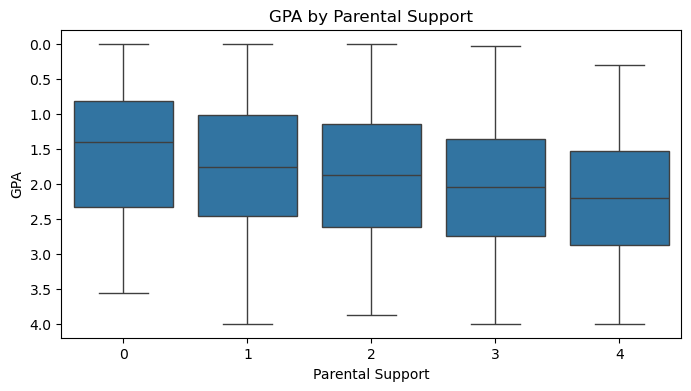

In [17]:

if 'ParentalSupport' in df.columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='ParentalSupport', y='GPA', data=df)
    plt.title("GPA by Parental Support")
    plt.xlabel("Parental Support"); plt.ylabel("GPA")
    plt.show()


### 🔹 Visualization 8:Average GPA by Sports Participation (Line Chart)

This visualization shows the **Average GPA of students grouped by their sports participation (Yes / No)**.  

- If the line is **higher for "Yes"**, it indicates that students who participate in sports tend to perform better academically on average.  
- If it is **higher for "No"**, then sports participation might not contribute to GPA improvement.  
- The line chart makes it easy to compare differences between the two categories.  

This analysis helps us understand whether **physical activity and extracurricular involvement** correlate positively or negatively with academic performance.


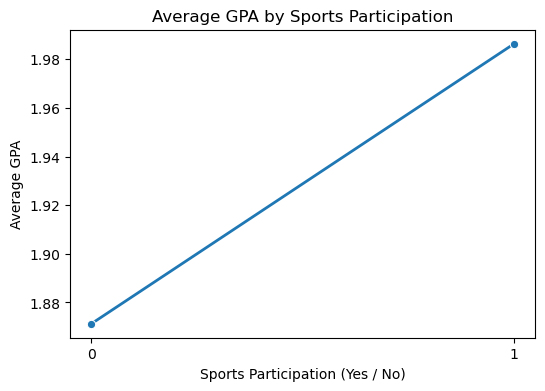

In [26]:

df['GPA'] = pd.to_numeric(df['GPA'], errors='coerce')

df['Sports'] = df['Sports'].astype(str)
sports_gpa = df.groupby('Sports')['GPA'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.lineplot(x='Sports', y='GPA', data=sports_gpa, marker='o', linewidth=2)
plt.title("Average GPA by Sports Participation")
plt.xlabel("Sports Participation (Yes / No)")
plt.ylabel("Average GPA")
plt.show()


### 🔹 Visualization 9: Average GPA Distribution by Extracurricular Participation (Pie Chart)

In this visualization, we analyze the relationship between **extracurricular activity participation** and **average GPA**.  
A pie chart is used to show how the average GPA is distributed between students who participate in extracurricular activities and those who do not.  

This helps us quickly identify whether extracurricular involvement has a significant impact on students' academic performance.




C:\Users\anjan\AppData\Local\Temp\ipykernel_1792\3971648917.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  extra_gpa = df.groupby('Extracurricular')['GPA'].mean()


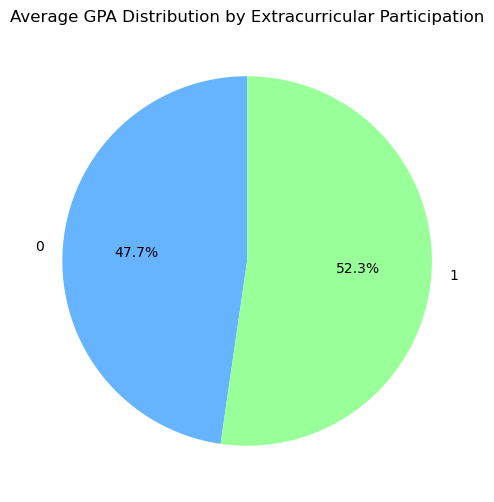

In [27]:
extra_gpa = df.groupby('Extracurricular')['GPA'].mean()

plt.figure(figsize=(6,6))
plt.pie(extra_gpa, labels=extra_gpa.index, autopct='%1.1f%%',
        startangle=90, colors=['#66b3ff','#99ff99'])
plt.title("Average GPA Distribution by Extracurricular Participation")
plt.show()


### 🔹 Visualization 11: Correlation Heatmap of Numeric Variables

In this visualization, we explore the **relationships between all numeric variables** in the dataset using a correlation heatmap.  
Correlation values range from **-1 to +1**:  
- **+1** → Strong positive correlation (as one variable increases, the other also increases).  
- **-1** → Strong negative correlation (as one increases, the other decreases).  
- **0** → No linear correlation.  

The heatmap provides an easy way to spot which factors are most related to **GPA** and other academic performance indicators.




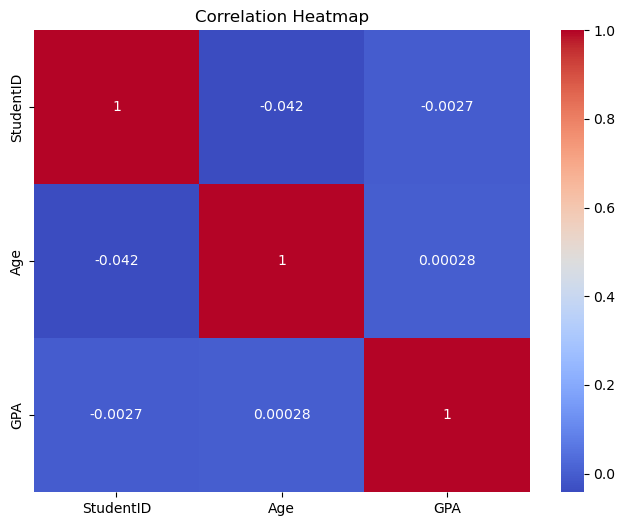

In [36]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## 6. Detailed Insights (paragraphs)

**Absences:** Across scatter and linear-fit analysis, absences show a clear negative relationship with GPA. This indicates attendance is a highly actionable lever — interventions targeted at students with frequent absences could yield academic improvement.

**Study time:** There is a positive relationship between weekly study hours and GPA. However, the scatter + smoothing line shows diminishing returns beyond a certain number of hours (possible fatigue or inefficient study). Emphasize study quality (techniques) over mere duration.

**Parental factors:** Parental education and parental support boxplots show higher medians for students from more educated or supportive households. These are proxies for home learning environment and resources, suggesting family engagement activities could help lower-performing groups.

**Extracurriculars (Sports & Music):** Students participating in sports or music do not perform worse — many achieve comparable or slightly better GPAs. Encouraging balanced extracurricular involvement is consistent with holistic development and does not demonstrated academic harm.

**Performance distribution:** The PerformanceCategory counts show the majority of students fall into Average and Good categories. A smaller but important fraction are ‘Poor’ and need targeted support.


## 7. Recommendations & Next Steps (detailed)

1. **Attendance monitoring and intervention** — build early-warning systems for rising absence counts, and assign counselling or outreach for flagged students.  
2. **Study skills programs** — workshops focused on effective study techniques (active recall, spaced repetition, goal-setting) rather than only increasing hours.  
3. **Parental engagement** — regular communication, workshops and resource sharing with parents (especially in lower parental-education groups) to improve home support.  
4. **Support for extras** — encourage extracurriculars as they don’t harm academic outcomes; use them to improve student motivation and social skills.  
5. **Targeted tutoring** — identify 'Poor' performance students for small-group or one-to-one tutoring interventions and track progress.  
6. **Data improvements** — collect homework completion, socio-economic indicators, teacher assessments, and timestamps for longitudinal tracking. These features will improve any predictive models.  
7. **Pilot predictive model** — build a simple classifier (e.g., logistic regression or random forest) to flag students at risk of falling into the 'Poor' category using features identified in the EDA.


## 8. Conclusion

This analysis surfaces clear patterns: attendance, study habits, and family background are the most significant correlates of student academic outcomes. With targeted interventions on absenteeism, study quality improvements, parental engagement and supportive extracurricular opportunities, schools can make data-driven decisions that support student success.  

Use the visualizations and cleaned dataset in this notebook as a reproducible foundation for building predictive tools and monitoring interventions continuously.
